In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('data/vis_data.csv')
df.head()

,PatientID,Treatment,HRPre,HR2W,HR4W,HR18M,mortality _treatement_period,Mortality18M,EFPre,EF2W,EF4W,EF18M,QoLPre,QoL2W,QoL4W,QoL18M,AdjPreLVSize,AdjLVSize2W,AdjLVSize4W,AdjLVSize18M
0,1,0,82.0,85.0,89.0,Dead,1.0,0.0,0.25,0.25,0.24,Dead,72.0,69.0,68.0,Dead,7.1,7.0,7.2,7.1
1,2,0,89.0,87.0,61.0,Dead,1.0,0.0,0.27,0.28,0.27,Dead,51.0,55.0,56.0,Dead,7.1,7.2,6.9,7.0
2,3,0,95.0,94.0,91.0,Dead,1.0,0.0,0.21,0.22,0.22,Dead,64.0,62.0,66.0,Dead,6.1,6.1,5.8,5.9
3,4,1,105.0,82.0,79.0,Dead,1.0,0.0,0.17,0.21,0.24,Dead,67.0,45.0,39.0,Dead,6.0,5.5,4.7,4.4
4,5,1,100.0,81.0,72.0,65,1.0,1.0,0.22,0.33,0.45,0.49,62.0,49.0,32.0,24,6.0,5.4,4.5,4.1


### Heart rate

In [12]:
# Calculate the average left ventricular size for each treatment group and measurement time
hr_df = df.groupby(['Treatment']).agg({
    'HRPre': 'mean',
    'HR2W': 'mean',
    'HR4W': 'mean'
}).reset_index()

hr_df['Treatment'] = hr_df['Treatment'].replace({0: 'Placebo', 1: "Treatment"})

# Display the new dataframe
print(hr_df)

   Treatment  HRPre  HR2W  HR4W
0    Placebo   89.6  89.0  83.4
1  Treatment   91.4  79.4  71.0


In [ ]:
from scipy import stats

# Split the data into the placebo and experimental groups
placebo = df.loc[df['Treatment'] == 0]
experimental = df.loc[df['Treatment'] == 1]

# Perform a t-test on HRPre
t_stat, p_value = stats.ttest_ind(placebo['HRPre'], experimental['HRPre'])
print(f"HRPre t-statistic: {t_stat}, p-value: {p_value}")

# Perform a t-test on HR2W
t_stat, p_value = stats.ttest_ind(placebo['HR2W'], experimental['HR2W'])
print(f"HR2W t-statistic: {t_stat}, p-value: {p_value}")

# Perform a t-test on HR4W
t_stat, p_value = stats.ttest_ind(placebo['HR4W'], experimental['HR4W'])
print(f"HR4W t-statistic: {t_stat}, p-value: {p_value}")

In [30]:
from scipy import stats

# Split the data into the placebo and experimental groups
placebo = df.loc[df['Treatment'] == 0]
experimental = df.loc[df['Treatment'] == 1]

# Perform a t-test on HR2W
t_stat, p_value = stats.ttest_ind(placebo['HR2W'], experimental['HR2W'])
print(f"HR2W t-statistic: {t_stat}, p-value: {p_value}")

# Perform a t-test on HR4W
t_stat, p_value = stats.ttest_ind(placebo['HR4W'], experimental['HR4W'])
print(f"HR4W t-statistic: {t_stat}, p-value: {p_value}")

HR2W t-statistic: 2.935720331594385, p-value: 0.008835800530568835
HR4W t-statistic: 2.433712883134466, p-value: 0.025589281604537793


HR2W t-statistic: 2.935720331594385, p-value: 0.008835800530568835
HR4W t-statistic: 2.433712883134466, p-value: 0.025589281604537793


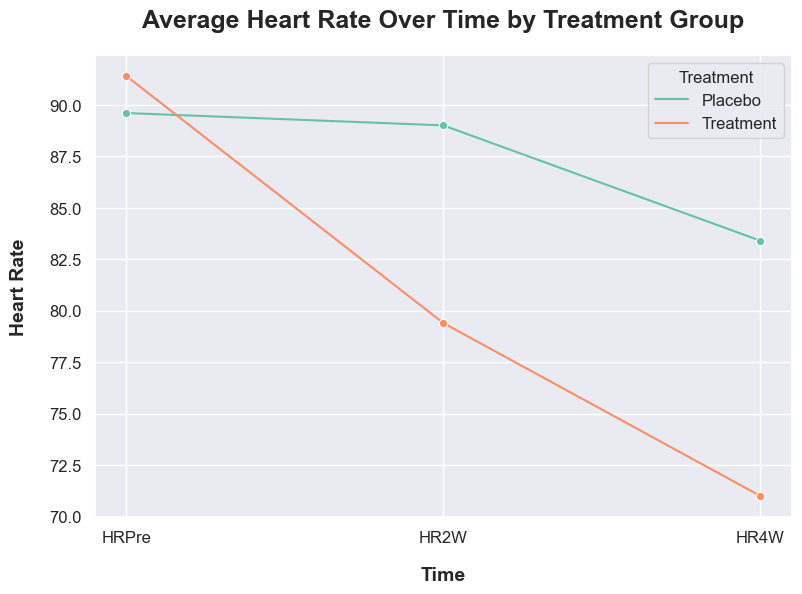

In [32]:
# Perform a t-test on HR2W
t_stat, p_value = stats.ttest_ind(placebo['HR2W'], experimental['HR2W'])
print(f"HR2W t-statistic: {t_stat}, p-value: {p_value}")

# Perform a t-test on HR4W
t_stat, p_value = stats.ttest_ind(placebo['HR4W'], experimental['HR4W'])
print(f"HR4W t-statistic: {t_stat}, p-value: {p_value}")

# Melt the dataframe to create a "long" format for seaborn
hr_melted = hr_df.melt(id_vars='Treatment', var_name='Time', value_name='Heart Rate')

# create the plot
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=hr_melted, x='Time', y='Heart Rate', hue='Treatment', marker='o', ax=ax)

# set the title font size
ax.set_title('Average Heart Rate Over Time by Treatment Group', fontsize=18, fontweight='bold', pad=20)

# set the x and y axis labels and font size
ax.set_xlabel('Time', fontsize=14,fontweight='bold', labelpad=15)
ax.set_ylabel('Heart Rate', fontsize=14, fontweight='bold', labelpad=15)

# set the legend title and font size
ax.legend(title='Treatment', fontsize=12)

# set the tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()


In [33]:
df.columns

Index(['PatientID', 'Treatment', 'HRPre', 'HR2W', 'HR4W', 'HR18M',
       'mortality _treatement_period', 'Mortality18M', 'EFPre', 'EF2W', 'EF4W',
       'EF18M', 'QoLPre', 'QoL2W', 'QoL4W', 'QoL18M', 'AdjPreLVSize',
       'AdjLVSize2W', 'AdjLVSize4W', 'AdjLVSize18M'],
      dtype='object')

### Left Ventricular Measurement

In [34]:
# Calculate the average left ventricular size for each treatment group and measurement time
hs_df = df.groupby(['Treatment']).agg({
    'AdjPreLVSize': 'mean',
    'AdjLVSize2W': 'mean',
    'AdjLVSize4W': 'mean'
}).reset_index()

hs_df['Treatment'] = hs_df['Treatment'].replace({0: 'Placebo', 1: "Treatment"})

# Display the new dataframe
print(hs_df)

   Treatment  AdjPreLVSize  AdjLVSize2W  AdjLVSize4W
0    Placebo          6.61         6.55         6.47
1  Treatment          6.58         6.09         5.35


In [36]:
from scipy import stats

# Split the data into the placebo and experimental groups
placebo = df.loc[df['Treatment'] == 0]
experimental = df.loc[df['Treatment'] == 1]



AdjLVSize2W t-statistic: 2.1360079464488804, p-value: 0.04666819646102995
AdjLVSize4W t-statistic: 4.424884696640582, p-value: 0.000326969643860699


AdjLVSize2W t-statistic: 2.1360079464488804, p-value: 0.04666819646102995
AdjLVSize4W t-statistic: 4.424884696640582, p-value: 0.000326969643860699


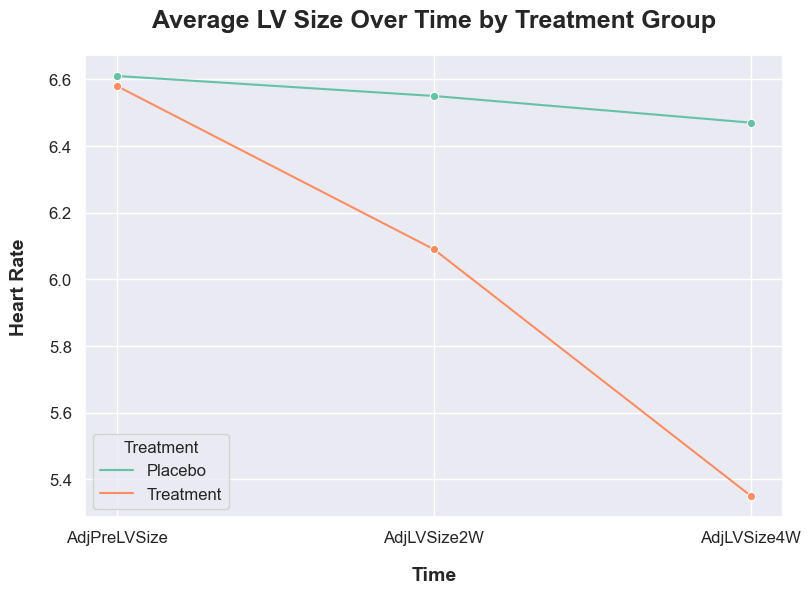

In [38]:
# Perform a t-test on HR2W
t_stat, p_value = stats.ttest_ind(placebo['AdjLVSize2W'], experimental['AdjLVSize2W'])
print(f"AdjLVSize2W t-statistic: {t_stat}, p-value: {p_value}")

# Perform a t-test on HR4W
t_stat, p_value = stats.ttest_ind(placebo['AdjLVSize4W'], experimental['AdjLVSize4W'])
print(f"AdjLVSize4W t-statistic: {t_stat}, p-value: {p_value}")

# Melt the dataframe to create a "long" format for seaborn
hs_melted = hs_df.melt(id_vars='Treatment', var_name='Time', value_name='LV Size')

# create the plot
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=hs_melted, x='Time', y='LV Size', hue='Treatment', marker='o', ax=ax)

# set the title font size
ax.set_title('Average LV Size Over Time by Treatment Group', fontsize=18, fontweight='bold', pad=20)

# set the x and y axis labels and font size
ax.set_xlabel('Time', fontsize=14,fontweight='bold', labelpad=15)
ax.set_ylabel('Heart Rate', fontsize=14, fontweight='bold', labelpad=15)

# set the legend title and font size
ax.legend(title='Treatment', fontsize=12)

# set the tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

### Ejection Fraction

In [39]:
df.columns

Index(['PatientID', 'Treatment', 'HRPre', 'HR2W', 'HR4W', 'HR18M',
       'mortality _treatement_period', 'Mortality18M', 'EFPre', 'EF2W', 'EF4W',
       'EF18M', 'QoLPre', 'QoL2W', 'QoL4W', 'QoL18M', 'AdjPreLVSize',
       'AdjLVSize2W', 'AdjLVSize4W', 'AdjLVSize18M'],
      dtype='object')

In [40]:
# Calculate the average left ventricular size for each treatment group and measurement time
ef_df = df.groupby(['Treatment']).agg({
    'EFPre': 'mean',
    'EF2W': 'mean',
    'EF4W': 'mean'
}).reset_index()

ef_df['Treatment'] = ef_df['Treatment'].replace({0: 'Placebo', 1: "Treatment"})

# Display the new dataframe
print(ef_df)

   Treatment  EFPre   EF2W   EF4W
0    Placebo  0.267  0.276  0.270
1  Treatment  0.250  0.321  0.398


EF2W t-statistic: -1.6452407632826251, p-value: 0.11726977020141689
EF2W t-statistic: -3.6923076923076925, p-value: 0.0016669736019993017


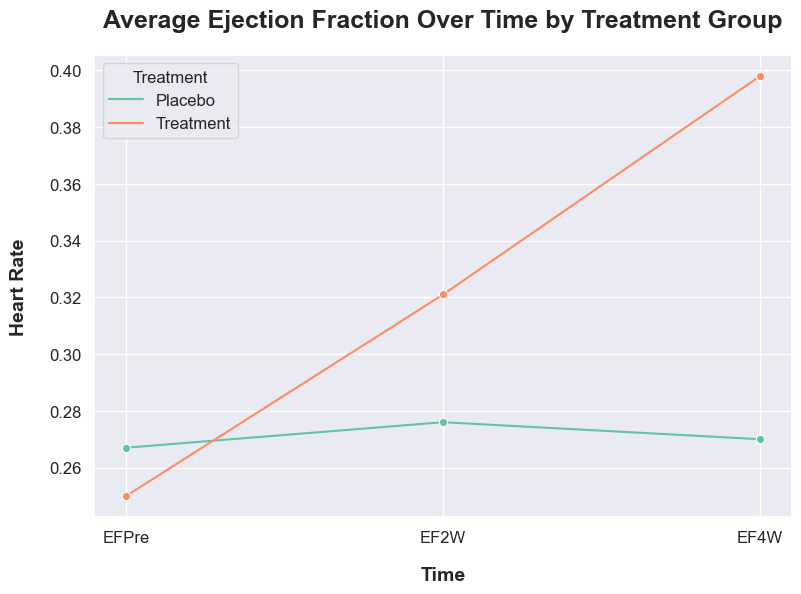

In [41]:
# Split the data into the placebo and experimental groups
placebo = df.loc[df['Treatment'] == 0]
experimental = df.loc[df['Treatment'] == 1]

# Perform a t-test on HR2W
t_stat, p_value = stats.ttest_ind(placebo['EF2W'], experimental['EF2W'])
print(f"EF2W t-statistic: {t_stat}, p-value: {p_value}")

# Perform a t-test on HR4W
t_stat, p_value = stats.ttest_ind(placebo['EF4W'], experimental['EF4W'])
print(f"EF2W t-statistic: {t_stat}, p-value: {p_value}")

# Melt the dataframe to create a "long" format for seaborn
ef_melted = ef_df.melt(id_vars='Treatment', var_name='Time', value_name='Ejection Fraction')

# create the plot
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=ef_melted, x='Time', y='Ejection Fraction', hue='Treatment', marker='o', ax=ax)

# set the title font size
ax.set_title('Average Ejection Fraction Over Time by Treatment Group', fontsize=18, fontweight='bold', pad=20)

# set the x and y axis labels and font size
ax.set_xlabel('Time', fontsize=14,fontweight='bold', labelpad=15)
ax.set_ylabel('Heart Rate', fontsize=14, fontweight='bold', labelpad=15)

# set the legend title and font size
ax.legend(title='Treatment', fontsize=12)

# set the tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

### Quality of Life

Minnesota Living with Heart Failure Questionnaire (MLHFQ)

In [42]:
df.columns

Index(['PatientID', 'Treatment', 'HRPre', 'HR2W', 'HR4W', 'HR18M',
       'mortality _treatement_period', 'Mortality18M', 'EFPre', 'EF2W', 'EF4W',
       'EF18M', 'QoLPre', 'QoL2W', 'QoL4W', 'QoL18M', 'AdjPreLVSize',
       'AdjLVSize2W', 'AdjLVSize4W', 'AdjLVSize18M'],
      dtype='object')

In [45]:
# Calculate the average left ventricular size for each treatment group and measurement time
ql_df = df.groupby(['Treatment']).agg({
    'QoLPre': 'mean',
    'QoL2W': 'mean',
    'QoL4W': 'mean'
}).reset_index()

ql_df['Treatment'] = ql_df['Treatment'].replace({0: 'Placebo', 1: "Treatment"})

# Display the new dataframe
print(ql_df)

   Treatment  QoLPre  QoL2W  QoL4W
0    Placebo    65.2   62.6   62.0
1  Treatment    69.9   52.7   44.8


QoL2W t-statistic: 1.285425247485328, p-value: 0.21493677873044878
QoL4W t-statistic: 2.121894216245255, p-value: 0.04798334530882063


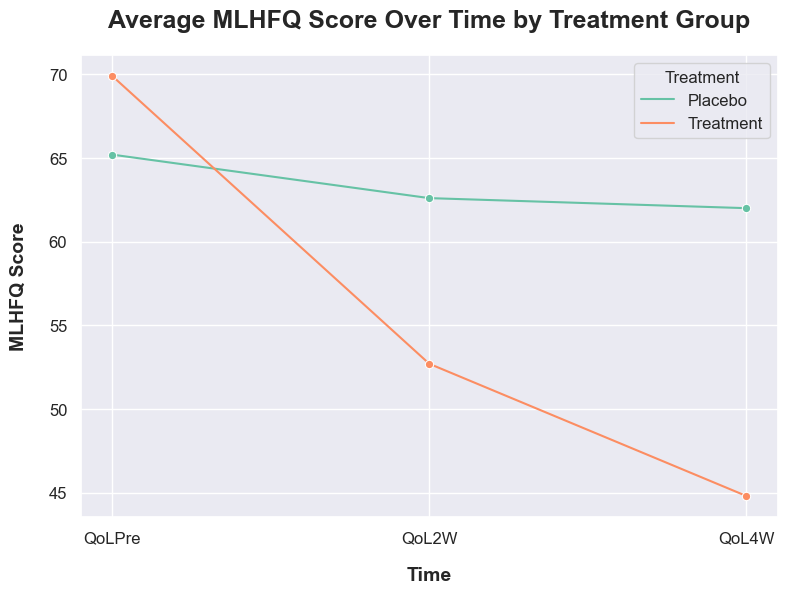

In [48]:
# Perform a t-test on HR2W
t_stat, p_value = stats.ttest_ind(placebo['QoL2W'], experimental['QoL2W'])
print(f"QoL2W t-statistic: {t_stat}, p-value: {p_value}")

# Perform a t-test on HR4W
t_stat, p_value = stats.ttest_ind(placebo['QoL4W'], experimental['QoL4W'])
print(f"QoL4W t-statistic: {t_stat}, p-value: {p_value}")

# Melt the dataframe to create a "long" format for seaborn
ql_melted = ql_df.melt(id_vars='Treatment', var_name='Time', value_name='Ejection Fraction')

# create the plot
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=ql_melted, x='Time', y='Ejection Fraction', hue='Treatment', marker='o', ax=ax)

# set the title font size
ax.set_title('Average MLHFQ Score Over Time by Treatment Group', fontsize=18, fontweight='bold', pad=20)

# set the x and y axis labels and font size
ax.set_xlabel('Time', fontsize=14,fontweight='bold', labelpad=15)
ax.set_ylabel('MLHFQ Score', fontsize=14, fontweight='bold', labelpad=15)

# set the legend title and font size
ax.legend(title='Treatment', fontsize=12)

# set the tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

## 3D Plot
Axes
- Heart Rate
- LV Size
- Ejection Fraction

Color: Treatment Group

Indicator Shape: Mortality 18 Months


In [49]:
df.columns

Index(['PatientID', 'Treatment', 'HRPre', 'HR2W', 'HR4W', 'HR18M',
       'mortality _treatement_period', 'Mortality18M', 'EFPre', 'EF2W', 'EF4W',
       'EF18M', 'QoLPre', 'QoL2W', 'QoL4W', 'QoL18M', 'AdjPreLVSize',
       'AdjLVSize2W', 'AdjLVSize4W', 'AdjLVSize18M'],
      dtype='object')

In [56]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=df['HRPre'],
    y=df['AdjPreLVSize'],
    z=df['EFPre'],
    mode='markers',
    marker=dict(
        size=10,
        color=df['Treatment'],
        
        symbol=df['Mortality18M'].replace({0: 'circle', 1: 'cross'})
    )
)])

fig.show()




In [58]:

import plotly.express as px
  
fig = px.scatter_3d(df, x = df['HRPre'], 
                    y = df['AdjPreLVSize'], z=df['EFPre'],
                    color = 'Treatment', symbol= 'Mortality18M')
  
fig.show()


In [61]:
fig = px.scatter_3d(df, x = df['HR4W'], 
                    y = df['AdjLVSize4W'], z=df['EF4W'],
                    color = 'Treatment', symbol= 'Mortality18M')
  
fig.show()


In [68]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

x = df['HR4W'].to_numpy
y = df['AdjLVSize4W'].to_numpy
z = df['EF4W'].to_numpy

fig = plt.figure(figsize=(6,6))
ax =Axes3D(fig, auto_add_to_figure=False)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(data=df,x,y,z,s=40, c="Treatment", marker="Mortality18M", cmap=cmap)
plt.show()

SyntaxError: positional argument follows keyword argument (3567605839.py, line 18)